Model Training

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/kunj/ML-DL/Cardio_ML_Project/data/cardio_preprocessed.csv')

In [3]:
df

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,0,18393,Male,168,62,110,80,1,1,0,0,1,0,50
1,1,1,20228,Female,156,85,140,90,3,1,0,0,1,1,55
2,2,2,18857,Female,165,64,130,70,3,1,0,0,0,1,51
3,3,3,17623,Male,169,82,150,100,1,1,0,0,1,1,48
4,4,4,17474,Female,156,56,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68677,69995,99993,19240,Male,168,76,120,80,1,1,1,0,1,0,52
68678,69996,99995,22601,Female,158,126,140,90,2,2,0,0,1,1,61
68679,69997,99996,19066,Male,183,105,180,90,3,1,0,1,0,1,52
68680,69998,99998,22431,Female,163,72,135,80,1,2,0,0,0,1,61


## Split data to x and y

In [4]:
#splitting the data into X and y
X = df.drop(['cardio','id','age','Unnamed: 0'],axis=1)
y = df[['cardio']]
X.shape, y.shape

((68682, 11), (68682, 1))

In [5]:
X

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
0,Male,168,62,110,80,1,1,0,0,1,50
1,Female,156,85,140,90,3,1,0,0,1,55
2,Female,165,64,130,70,3,1,0,0,0,51
3,Male,169,82,150,100,1,1,0,0,1,48
4,Female,156,56,100,60,1,1,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...
68677,Male,168,76,120,80,1,1,1,0,1,52
68678,Female,158,126,140,90,2,2,0,0,1,61
68679,Male,183,105,180,90,3,1,0,1,0,52
68680,Female,163,72,135,80,1,2,0,0,0,61


In [6]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
68677,0
68678,1
68679,1
68680,1


## Column Transformer 

In [7]:
# One-hot encode categorical columns 
# male female to 0 1
X1=pd.get_dummies(X,columns=['gender'])
X1

,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,gender_Female,gender_Male
0,168,62,110,80,1,1,0,0,1,50,False,True
1,156,85,140,90,3,1,0,0,1,55,True,False
2,165,64,130,70,3,1,0,0,0,51,True,False
3,169,82,150,100,1,1,0,0,1,48,False,True
4,156,56,100,60,1,1,0,0,0,47,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
68677,168,76,120,80,1,1,1,0,1,52,False,True
68678,158,126,140,90,2,2,0,0,1,61,True,False
68679,183,105,180,90,3,1,0,1,0,52,False,True
68680,163,72,135,80,1,2,0,0,0,61,True,False


## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X1, y,
    test_size=0.2, #ketlo traning ma ketlo testing ma
    random_state=42 #random data fix re
)

## Scaling Numerical Data (StandardScaler)

In [9]:
from sklearn.preprocessing import StandardScaler

num_cols=['height','weight','ap_hi','ap_lo','age_years']
sclr=StandardScaler()

#fit_tranform -> fit + transform -> learns statistics from data + uses those learned values to convert the data

#transform -> uses already learned values to convert the data

X_train[num_cols] = sclr.fit_transform(X_train[num_cols])
X_test[num_cols] = sclr.transform(X_test[num_cols])

In [10]:
print("Scaled Data Sample:") 
X_train

Scaled Data Sample:


,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,gender_Female,gender_Male
14018,0.448266,-0.286572,-1.589498,-2.231189,1,1,0,0,1,-1.896064,True,False
12535,0.321931,0.975890,-0.396198,-0.140047,1,1,0,0,1,-1.748217,True,False
4233,0.448266,0.134249,0.797101,-0.140047,1,2,0,0,1,0.025958,False,True
385,-2.583766,-1.058077,-0.396198,-0.140047,2,2,0,0,1,-0.565433,True,False
68573,1.079939,0.625206,0.797101,0.905524,1,1,0,0,1,0.913046,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
37194,-1.573089,0.695343,1.393751,1.951095,3,3,0,0,1,0.025958,True,False
6265,-0.057073,-0.567119,-0.396198,-0.140047,1,1,1,1,1,-0.861129,False,True
54886,0.069262,0.064112,0.498776,0.905524,1,1,0,0,1,0.469502,True,False
860,-1.067750,-0.987940,0.200451,-0.140047,3,3,0,0,1,1.060894,True,False


In [11]:
print("Scaled test Sample:") 
X_test

Scaled test Sample:


,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,gender_Female,gender_Male
16886,0.574600,0.064112,-0.396198,-0.140047,1,1,0,0,1,1.504438,True,False
38574,-1.320420,1.186300,0.797101,0.905524,1,1,0,0,1,1.504438,True,False
16107,0.321931,0.555069,1.393751,0.905524,1,1,0,0,1,-0.417585,True,False
19057,-0.941416,-0.356709,-0.396198,-0.140047,1,1,0,0,1,-1.156825,True,False
30247,0.700935,-0.426846,1.990400,0.905524,1,1,0,0,0,0.469502,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
58702,0.321931,-0.637256,-0.396198,-0.140047,1,1,0,0,1,0.469502,True,False
36290,-0.057073,-1.128213,-0.992848,-1.185618,1,1,0,0,0,-1.452521,True,False
53986,0.700935,-0.637256,-0.396198,-0.140047,1,1,0,0,0,-0.121889,True,False
68472,0.195596,-0.426846,-1.589498,-0.140047,1,1,0,0,1,1.504438,True,False


## Train Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf_model = RandomForestClassifier(
    n_estimators=100, #number of trees
    max_depth=10, #tree ni depth
    random_state=42
)

In [14]:
#model nu training
rf_model.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Predict the data

In [15]:
y_pred = rf_model.predict(X_test)

In [16]:
y_pred

array([1, 1, 1, ..., 0, 0, 1], shape=(13737,))

In [17]:
import matplotlib.pyplot as plt

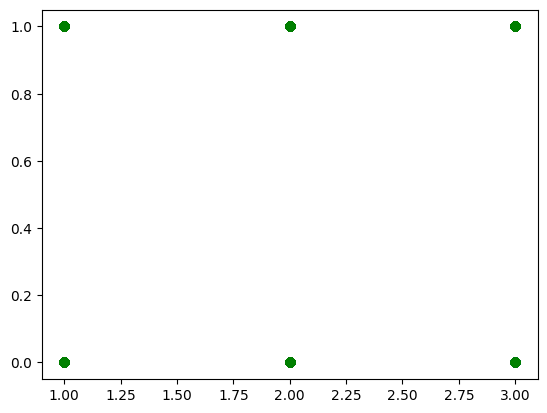

In [18]:
plt.scatter(X_test['cholesterol'],y_test)
plt.scatter(X_test['cholesterol'],y_pred,color='g')

In [19]:
#accuracy nu calculation
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.735313387202446


[[5439 1451]
 [2185 4662]]


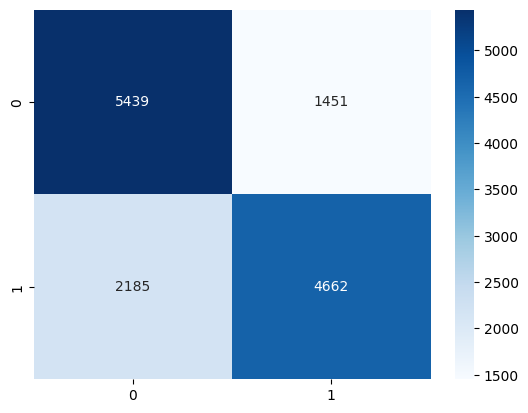

In [20]:
#confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# maru
cm = confusion_matrix(y_test, y_pred)
print(cm)
# AI
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [21]:
#reporting classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6890
           1       0.76      0.68      0.72      6847

    accuracy                           0.74     13737
   macro avg       0.74      0.74      0.73     13737
weighted avg       0.74      0.74      0.73     13737



In [22]:
print("Train Accuracy:", rf_model.score(X_train, y_train))
print("Test Accuracy:", rf_model.score(X_test, y_test))

Train Accuracy: 0.7526071526071526
Test Accuracy: 0.735313387202446


In [23]:
#difference between train and test accuracy
print("Accuracy Difference:", rf_model.score(X_train, y_train) - rf_model.score(X_test, y_test))

Accuracy Difference: 0.017293765404706618


In [26]:
# #for increasing accuracy

# #hyperparameter tuning using GridSearchCV

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ["sqrt", "log2"]
# }

# grid = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid,
#     cv=5, #cross validation
#     scoring='accuracy',
#     n_jobs=-1 #all cores use karva mate
# )

# grid.fit(X_train, y_train)

##cell2
# print("Best Parameters:", grid.best_params_)
# print("Best CV Accuracy:", grid.best_score_)


# best_rf = grid.best_estimator_

# y_pred_best = best_rf.predict(X_test)
# y_prob_best = best_rf.predict_proba(X_test)[:, 1]

#cell3
# print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
# print(classification_report(y_test, y_pred_best))

## ROC Curve

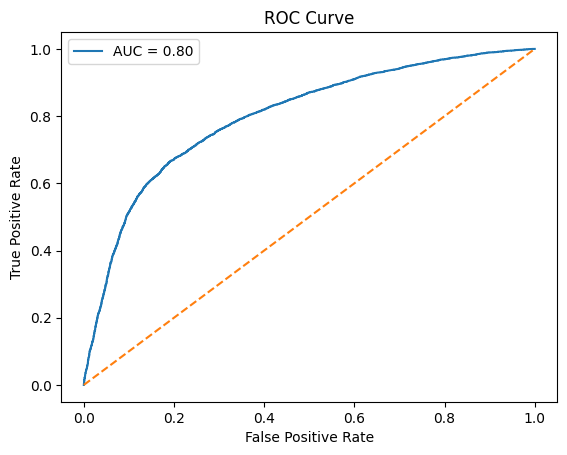

In [24]:
from sklearn.metrics import roc_curve, auc

y_prob = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [25]:
import pickle

In [26]:
with open("/Users/kunj/ML-DL/Cardio_ML_Project/models/rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [27]:
with open("/Users/kunj/ML-DL/Cardio_ML_Project/models/scaler.pkl", "wb") as f:
    pickle.dump(sclr, f)

In [28]:
feature_columns = X1.columns.to_list()

with open("/Users/kunj/ML-DL/Cardio_ML_Project/models/feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

In [29]:
feature_columns

['height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'age_years',
 'gender_Female',
 'gender_Male']

In [30]:


mappings = {
    "cholesterol": {
        "normal": 1,
        "above_normal": 2,
        "well_above": 3
    },
    "gluc": {
        "normal": 1,
        "above_normal": 2,
        "well_above": 3
    },
    "smoke": {
        "no": 0,
        "yes": 1
    },
    "alco": {
        "no": 0,
        "yes": 1
    },
    "active": {
        "no": 0,
        "yes": 1
    },
    "gender": {
        "Male": {"gender_Male": 1, "gender_Female": 0},
        "Female": {"gender_Male": 0, "gender_Female": 1}
    }
}

with open("/Users/kunj/ML-DL/Cardio_ML_Project/models/mappings.pkl", "wb") as f:
    pickle.dump(mappings, f)
    


In [32]:
import os 
os.listdir('/Users/kunj/ML-DL/Cardio_ML_Project/models')

['scaler.pkl', 'feature_columns.pkl', 'rf_model.pkl', 'mappings.pkl']

## Random Forest : Hyperparameter Tuning

In [34]:
#hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [35]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.7333333333333333


In [36]:
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Tuned Accuracy: 0.7362597364781248
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6890
           1       0.77      0.68      0.72      6847

    accuracy                           0.74     13737
   macro avg       0.74      0.74      0.74     13737
weighted avg       0.74      0.74      0.74     13737



## Random Forest : K-Fold

In [38]:
from sklearn.model_selection import cross_val_score

best_rf = grid.best_estimator_

rf_kfold_scores = cross_val_score(
    best_rf,
    X_train,
    y_train,
    cv=10,
    scoring='accuracy'
)

print("Random Forest K-Fold Accuracy:", rf_kfold_scores.mean())

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Random Forest K-Fold Accuracy: 0.7334607627213805


# Logistic Regression

### Train Test Split

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Train-Test Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Train-Test Accuracy: 0.7282521656839194


### HyperParameter Tuning

In [49]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='accuracy'
)

grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

print("Best Parameters:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best CV Accuracy: 0.7273637273637273


### K-Fold

In [51]:
lr_kfold_scores = cross_val_score(
    lr,
    X_train,
    y_train,
    cv=10,
    scoring='accuracy'
)

print("Logistic Regression K-Fold Accuracy:", lr_kfold_scores.mean())

Logistic Regression K-Fold Accuracy: 0.7269089581719225


# Support Vector Machine (SVM)

### Train Test Split

In [52]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Train-Test Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Train-Test Accuracy: 0.7336390769454757


### HyperParameter Tuning

In [53]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(
    SVC(),
    param_grid_svm,
    cv=5,
    scoring='accuracy'
)

grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_

print("Best Parameters:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best CV Accuracy: 0.7340795340795341


### K - Fold

In [54]:
svm_kfold_scores = cross_val_score(
    svm,
    X_train,
    y_train,
    cv=10,
    scoring='accuracy'
)

print("SVM K-Fold Accuracy:", svm_kfold_scores.mean())

SVM K-Fold Accuracy: 0.7341706015297357


# Naive Bayes 

### Train Test Split

In [55]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Train-Test Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Train-Test Accuracy: 0.7107083060347965


### HyperParameter Tuning

In [56]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

grid_nb = GridSearchCV(
    GaussianNB(),
    param_grid_nb,
    cv=5,
    scoring='accuracy'
)

grid_nb.fit(X_train, y_train)

best_nb = grid_nb.best_estimator_

print("Best Parameters:", grid_nb.best_params_)
print("Best CV Accuracy:", grid_nb.best_score_)

Best Parameters: {'var_smoothing': 1e-09}
Best CV Accuracy: 0.7101829101829102


### K - Fold

In [57]:
nb_kfold_scores = cross_val_score(
    nb,
    X_train,
    y_train,
    cv=10,
    scoring='accuracy'
)

print("Naive Bayes K-Fold Accuracy:", nb_kfold_scores.mean())

Naive Bayes K-Fold Accuracy: 0.7103831361402447


# Decision Tree

### Train Test Split

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Train-Test Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Train-Test Accuracy: 0.630559801994613


### HyperParameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy'
)

grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_

print("Best Parameters:", grid_dt.best_params_)
print("Best CV Accuracy:", grid_dt.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Accuracy: 0.7243789243789244


### K - Fold

In [60]:
from sklearn.model_selection import cross_val_score

dt_kfold_scores = cross_val_score(
    dt,
    X_train,
    y_train,
    cv=10,
    scoring='accuracy'
)

print("Decision Tree K-Fold Accuracy:", dt_kfold_scores.mean())

Decision Tree K-Fold Accuracy: 0.6324509291797521
